In [104]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/playground-series-s4e12/sample_submission.csv
/kaggle/input/playground-series-s4e12/train.csv
/kaggle/input/playground-series-s4e12/test.csv


In [105]:
sample_submission = pd.read_csv('/kaggle/input/playground-series-s4e12/sample_submission.csv')

In [106]:
train = pd.read_csv('/kaggle/input/playground-series-s4e12/train.csv')
test = pd.read_csv('/kaggle/input/playground-series-s4e12/test.csv')

In [107]:
train.shape

(1200000, 21)

In [108]:
test.shape

(800000, 20)

In [109]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200000 entries, 0 to 1199999
Data columns (total 21 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   id                    1200000 non-null  int64  
 1   Age                   1181295 non-null  float64
 2   Gender                1200000 non-null  object 
 3   Annual Income         1155051 non-null  float64
 4   Marital Status        1181471 non-null  object 
 5   Number of Dependents  1090328 non-null  float64
 6   Education Level       1200000 non-null  object 
 7   Occupation            841925 non-null   object 
 8   Health Score          1125924 non-null  float64
 9   Location              1200000 non-null  object 
 10  Policy Type           1200000 non-null  object 
 11  Previous Claims       835971 non-null   float64
 12  Vehicle Age           1199994 non-null  float64
 13  Credit Score          1062118 non-null  float64
 14  Insurance Duration    1199999 non-

In [110]:
train.sample(3)

,id,Age,Gender,Annual Income,Marital Status,Number of Dependents,Education Level,Occupation,Health Score,Location,...,Previous Claims,Vehicle Age,Credit Score,Insurance Duration,Policy Start Date,Customer Feedback,Smoking Status,Exercise Frequency,Property Type,Premium Amount
100786,100786,56.0,Male,54787.0,Divorced,1.0,High School,NaN,14.591553,Suburban,...,0.0,4.0,703.0,7.0,2022-10-22 15:21:39.091080,Good,No,Monthly,Condo,48.0
376828,376828,26.0,Male,90429.0,Married,4.0,PhD,NaN,4.678418,Suburban,...,1.0,15.0,710.0,8.0,2022-05-27 15:21:39.172097,Poor,No,Monthly,Apartment,45.0
726222,726222,58.0,Male,80970.0,Divorced,NaN,High School,NaN,37.145544,Suburban,...,2.0,11.0,443.0,3.0,2022-09-26 15:21:39.254678,Good,No,Weekly,Apartment,1236.0


In [111]:
train.isna().sum()

id                           0
Age                      18705
Gender                       0
Annual Income            44949
Marital Status           18529
Number of Dependents    109672
Education Level              0
Occupation              358075
Health Score             74076
Location                     0
Policy Type                  0
Previous Claims         364029
Vehicle Age                  6
Credit Score            137882
Insurance Duration           1
Policy Start Date            0
Customer Feedback        77824
Smoking Status               0
Exercise Frequency           0
Property Type                0
Premium Amount               0
dtype: int64

In [112]:
test.isna().sum()

id                           0
Age                      12489
Gender                       0
Annual Income            29860
Marital Status           12336
Number of Dependents     73130
Education Level              0
Occupation              239125
Health Score             49449
Location                     0
Policy Type                  0
Previous Claims         242802
Vehicle Age                  3
Credit Score             91451
Insurance Duration           2
Policy Start Date            0
Customer Feedback        52276
Smoking Status               0
Exercise Frequency           0
Property Type                0
dtype: int64

## Age Settlement

<Axes: >

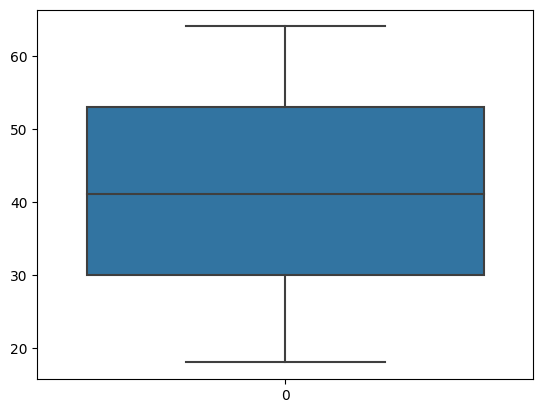

In [113]:
# age settle
import seaborn as sns 
sns.boxplot(train['Age'])

In [114]:
train['Age'].value_counts()    

Age
53.0    26354
61.0    26218
39.0    26042
64.0    25990
57.0    25971
43.0    25966
62.0    25849
46.0    25756
33.0    25728
47.0    25709
44.0    25642
34.0    25615
58.0    25544
31.0    25500
56.0    25450
32.0    25435
54.0    25370
38.0    25346
36.0    25340
35.0    25323
22.0    25309
59.0    25173
37.0    25163
51.0    25162
55.0    25132
49.0    25107
45.0    25101
20.0    25055
21.0    24987
50.0    24943
40.0    24877
48.0    24834
26.0    24805
24.0    24690
30.0    24683
29.0    24673
19.0    24641
42.0    24626
60.0    24593
52.0    24592
18.0    24488
28.0    24455
63.0    24283
25.0    24221
27.0    24212
41.0    24117
23.0    23225
Name: count, dtype: int64

In [115]:
# no outliers 
# hence replacable with mean
# can use sklearn imputer
x = train['Age'].mean().astype(int)
train['Age'].fillna(x,inplace=True)
# age settled

<Axes: >

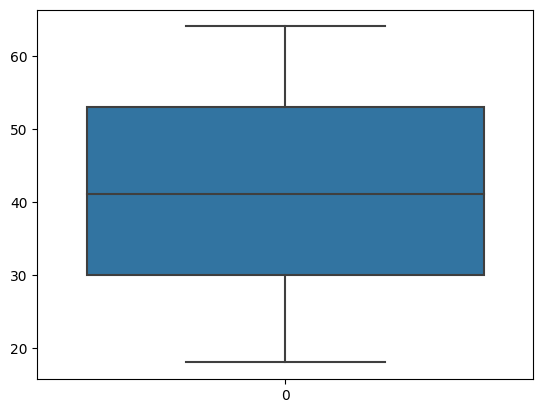

In [116]:
sns.boxplot(test['Age'])

In [117]:
y = test['Age'].mean().astype(int)
test['Age'].fillna(y,inplace=True)


## Annual Income Settlement

In [118]:
# null values in train and test dataset
# Annual Income            44949
# Annual Income            29860
# can be settled in same way as age or by using sklearn imputer
from sklearn.impute import SimpleImputer 
imputer = SimpleImputer(strategy = 'mean')
train['Annual Income'] = imputer.fit_transform(train[['Annual Income']])

In [119]:
test['Annual Income'] = imputer.fit_transform(test[['Annual Income']])
# Annual Income settled

## Marital Status Settlement

In [120]:
# Marital Status           18529
# Marital Status           12336
train['Marital Status'].value_counts()


Marital Status
Single      395391
Married     394316
Divorced    391764
Name: count, dtype: int64

In [121]:
# filling missing values
# freq_imputer= SimpleImputer(strategy= 'most_frequent')
# train['Marital Status'] = freq_imputer.fit_transform(train[['Marital Status']])
import numpy as np
ls = ['Single', 'Married','Divorced']
train['Marital Status']=train['Marital Status'].apply(lambda x: np.random.choice(ls) if pd.isna(x) else x)
train['Marital Status'].value_counts()

Marital Status
Single      401610
Married     400533
Divorced    397857
Name: count, dtype: int64

In [122]:
test['Marital Status']=test['Marital Status'].apply(lambda x: np.random.choice(ls) if pd.isna(x) else x)

In [123]:
# applying label encoding
from sklearn.preprocessing import LabelEncoder
x = LabelEncoder()
train['Marital Status'] =x.fit_transform(train['Marital Status'])

In [124]:
train['Marital Status'].value_counts()
# 0 stands for divorced
# 1 stands for married
# 2 stands for Single
# can be seen by comparing the value counts or by getting out the mapping
# this must be same for the test dataset 

Marital Status
2    401610
1    400533
0    397857
Name: count, dtype: int64

In [125]:
test['Marital Status'].value_counts()

Marital Status
Single      267852
Married     266297
Divorced    265851
Name: count, dtype: int64

In [126]:
mapping = [['Divorced', 'Married','Single']]
from sklearn.preprocessing import OrdinalEncoder 
x = OrdinalEncoder(categories = mapping)
test['Marital Status']=x.fit_transform(test[['Marital Status']])

In [127]:
test['Marital Status'].value_counts()
# Marrital status settled

Marital Status
2.0    267852
1.0    266297
0.0    265851
Name: count, dtype: int64

## Number of Dependents 

In [128]:
# Number of Dependents    109672
# Number of Dependents    73130
train['Number of Dependents'].value_counts()

Number of Dependents
3.0    221475
4.0    220340
0.0    218124
2.0    215313
1.0    215076
Name: count, dtype: int64

In [129]:
test['Number of Dependents'].value_counts()

Number of Dependents
3.0    147745
4.0    146268
0.0    144802
2.0    144165
1.0    143890
Name: count, dtype: int64

In [130]:
x = SimpleImputer(strategy = 'median')
train['Number of Dependents']= x.fit_transform(train[['Number of Dependents']])
test['Number of Dependents']= x.fit_transform(test[['Number of Dependents']])

In [131]:
train['Number of Dependents'].isna().sum()

0

## Education level settlement

In [132]:
# Education level encoding
train['Education Level'].value_counts()

Education Level
Master's       303818
PhD            303507
Bachelor's     303234
High School    289441
Name: count, dtype: int64

In [133]:
x = LabelEncoder()
train['Education Level'] =x.fit_transform(train['Education Level'])

In [134]:
train['Education Level'].value_counts()

Education Level
2    303818
3    303507
0    303234
1    289441
Name: count, dtype: int64

In [135]:
test['Education Level'].value_counts()

Education Level
Master's       202552
PhD            202468
Bachelor's     202223
High School    192757
Name: count, dtype: int64

In [136]:
mapping = [["Master's","PhD","Bachelor's","High School"]]
x = OrdinalEncoder(categories = mapping)
test['Education Level']=x.fit_transform(test[['Education Level']])
# Education Level settled

## Occupation Settlement

In [137]:
train['Occupation'].value_counts()

Occupation
Employed         282750
Self-Employed    282645
Unemployed       276530
Name: count, dtype: int64

In [138]:
# Occupation              358075
# Occupation              239125
train['Occupation'].fillna("Unknown",inplace=True)
test['Occupation'].fillna("Unknown",inplace=True)


In [139]:
train['Occupation'].value_counts()


Occupation
Unknown          358075
Employed         282750
Self-Employed    282645
Unemployed       276530
Name: count, dtype: int64

In [140]:
x = LabelEncoder()
train['Occupation'] =x.fit_transform(train['Occupation'])
train['Occupation'].value_counts()

Occupation
3    358075
0    282750
1    282645
2    276530
Name: count, dtype: int64

In [141]:
test['Occupation'].value_counts()

Occupation
Unknown          239125
Employed         188574
Self-Employed    187991
Unemployed       184310
Name: count, dtype: int64

In [142]:
x = LabelEncoder()
test['Occupation'] =x.fit_transform(test['Occupation'])
test['Occupation'].value_counts()
# Occupation settled

Occupation
3    239125
0    188574
1    187991
2    184310
Name: count, dtype: int64

## Health Score Settlement

In [143]:
train['Health Score'].mean().astype(int)

25

In [144]:
test['Health Score'].mean().astype(int)

25

In [145]:
train['Health Score'].fillna(25,inplace = True)
test['Health Score'].fillna(25,inplace = True)
# Health Score settled

## Previous Claims Settlement

In [146]:
train['Previous Claims'].value_counts()

Previous Claims
0.0    305433
1.0    300811
2.0    167661
3.0     49011
4.0     10668
5.0      2018
6.0       302
7.0        58
8.0         8
9.0         1
Name: count, dtype: int64

In [147]:
test['Previous Claims'].value_counts()

Previous Claims
0.0    202806
1.0    200881
2.0    112100
3.0     32753
4.0      7021
5.0      1393
6.0       204
7.0        28
9.0         8
8.0         4
Name: count, dtype: int64

In [148]:
x = SimpleImputer(strategy = 'median')
train['Previous Claims']= x.fit_transform(train[['Previous Claims']])
test['Previous Claims']= x.fit_transform(test[['Previous Claims']])

In [149]:
train['Previous Claims'].isna().sum()

0

## Vehicle Age

In [150]:
train['Vehicle Age'].isna().sum()

6

In [151]:
x = SimpleImputer(strategy = 'most_frequent')
train['Vehicle Age']= x.fit_transform(train[['Vehicle Age']])
test['Vehicle Age']= x.fit_transform(test[['Vehicle Age']])

## Insurance Duration

In [152]:
x = SimpleImputer(strategy = 'most_frequent')
train['Insurance Duration']= x.fit_transform(train[['Insurance Duration']])
test['Insurance Duration']= x.fit_transform(test[['Insurance Duration']])

In [153]:
train['Insurance Duration'].value_counts()

Insurance Duration
9.0    137782
1.0    135072
8.0    133800
7.0    133592
5.0    132253
4.0    132182
6.0    132141
3.0    132018
2.0    131160
Name: count, dtype: int64

## Credit Score Settlement

In [154]:
x = SimpleImputer(strategy = 'mean')
train['Credit Score'] = x.fit_transform(train[['Credit Score']])
test['Credit Score'] = x.fit_transform(test[['Credit Score']])

## Policy type Settlement

In [155]:
train['Policy Type'].value_counts()

Policy Type
Premium          401846
Comprehensive    399600
Basic            398554
Name: count, dtype: int64

In [156]:
x = LabelEncoder()
train['Policy Type']  = x.fit_transform(train['Policy Type'])
test['Policy Type']  = x.fit_transform(test['Policy Type'])

In [157]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200000 entries, 0 to 1199999
Data columns (total 21 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   id                    1200000 non-null  int64  
 1   Age                   1200000 non-null  float64
 2   Gender                1200000 non-null  object 
 3   Annual Income         1200000 non-null  float64
 4   Marital Status        1200000 non-null  int64  
 5   Number of Dependents  1200000 non-null  float64
 6   Education Level       1200000 non-null  int64  
 7   Occupation            1200000 non-null  int64  
 8   Health Score          1200000 non-null  float64
 9   Location              1200000 non-null  object 
 10  Policy Type           1200000 non-null  int64  
 11  Previous Claims       1200000 non-null  float64
 12  Vehicle Age           1200000 non-null  float64
 13  Credit Score          1200000 non-null  float64
 14  Insurance Duration    1200000 non-

## Policy Date Settlement

In [158]:
def date(df):
    df['Policy Start Date'] = pd.to_datetime(df['Policy Start Date'])
    df['Year'] = df['Policy Start Date'].dt.year
    df['Day'] = df['Policy Start Date'].dt.day
    df['Month'] = df['Policy Start Date'].dt.month
    df['Month_name'] = df['Policy Start Date'].dt.month_name()
    df['Day_of_week'] = df['Policy Start Date'].dt.day_name()
    df['Week'] = df['Policy Start Date'].dt.isocalendar().week
    df['Year_sin'] = np.sin(2 * np.pi * df['Year'])
    df['Year_cos'] = np.cos(2 * np.pi * df['Year'])
    df['Month_sin'] = np.sin(2 * np.pi * df['Month'] / 12) 
    df['Month_cos'] = np.cos(2 * np.pi * df['Month'] / 12)
    df['Day_sin'] = np.sin(2 * np.pi * df['Day'] / 31)  
    df['Day_cos'] = np.cos(2 * np.pi * df['Day'] / 31)
    df['Group'] = (df['Year']-2020)*48 + df['Month']*4 + df['Day']//7
    df.drop('Policy Start Date', axis=1, inplace=True)
    return df

In [159]:
date(train)
date(test)

,id,Age,Gender,Annual Income,Marital Status,Number of Dependents,Education Level,Occupation,Health Score,Location,...,Month_name,Day_of_week,Week,Year_sin,Year_cos,Month_sin,Month_cos,Day_sin,Day_cos,Group
0,1200000,28.0,Female,2310.0,1.0,4.0,2.0,1,7.657981,Rural,...,June,Sunday,22,-6.447061e-13,1.0,1.224647e-16,-1.000000e+00,0.724793,0.688967,168
1,1200001,31.0,Female,126031.0,1.0,2.0,0.0,1,13.381379,Suburban,...,April,Monday,17,1.585375e-14,1.0,8.660254e-01,-5.000000e-01,-0.968077,-0.250653,211
2,1200002,47.0,Female,17092.0,0.0,0.0,1.0,2,24.354527,Urban,...,April,Wednesday,14,-6.447061e-13,1.0,8.660254e-01,-5.000000e-01,0.848644,0.528964,160
3,1200003,28.0,Female,30424.0,0.0,3.0,1.0,1,5.136225,Suburban,...,October,Wednesday,43,-6.447061e-13,1.0,-8.660254e-01,5.000000e-01,-0.937752,0.347305,187
4,1200004,24.0,Male,10863.0,0.0,2.0,3.0,2,11.844155,Suburban,...,November,Friday,47,-1.468363e-13,1.0,-5.000000e-01,8.660254e-01,-0.848644,0.528964,95
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
799995,1999995,50.0,Female,38782.0,1.0,1.0,2.0,3,14.498639,Rural,...,July,Friday,27,-1.468363e-13,1.0,-5.000000e-01,-8.660254e-01,0.968077,-0.250653,77
799996,1999996,41.0,Female,73462.0,2.0,0.0,0.0,3,8.145748,Rural,...,March,Tuesday,13,-6.447061e-13,1.0,1.000000e+00,6.123234e-17,-0.571268,0.820763,160
799997,1999997,26.0,Female,35178.0,2.0,0.0,0.0,0,6.636583,Urban,...,September,Monday,40,3.510335e-13,1.0,-1.000000e+00,-1.836970e-16,-0.201299,0.979530,-8
799998,1999998,34.0,Female,45661.0,2.0,3.0,0.0,3,15.937248,Urban,...,May,Monday,19,-1.305266e-12,1.0,5.000000e-01,-8.660254e-01,0.968077,-0.250653,117


In [160]:
train.isna().sum()

id                          0
Age                         0
Gender                      0
Annual Income               0
Marital Status              0
Number of Dependents        0
Education Level             0
Occupation                  0
Health Score                0
Location                    0
Policy Type                 0
Previous Claims             0
Vehicle Age                 0
Credit Score                0
Insurance Duration          0
Customer Feedback       77824
Smoking Status              0
Exercise Frequency          0
Property Type               0
Premium Amount              0
Year                        0
Day                         0
Month                       0
Month_name                  0
Day_of_week                 0
Week                        0
Year_sin                    0
Year_cos                    0
Month_sin                   0
Month_cos                   0
Day_sin                     0
Day_cos                     0
Group                       0
dtype: int

In [161]:
test.isna().sum()

id                          0
Age                         0
Gender                      0
Annual Income               0
Marital Status              0
Number of Dependents        0
Education Level             0
Occupation                  0
Health Score                0
Location                    0
Policy Type                 0
Previous Claims             0
Vehicle Age                 0
Credit Score                0
Insurance Duration          0
Customer Feedback       52276
Smoking Status              0
Exercise Frequency          0
Property Type               0
Year                        0
Day                         0
Month                       0
Month_name                  0
Day_of_week                 0
Week                        0
Year_sin                    0
Year_cos                    0
Month_sin                   0
Month_cos                   0
Day_sin                     0
Day_cos                     0
Group                       0
dtype: int64

## Modelling using XGB

In [162]:
x = train.drop(columns = ['id','Gender','Location','Customer Feedback','Smoking Status','Exercise Frequency','Property Type','Month_name','Day_of_week'],axis=1)

In [163]:
y= test.drop(columns = ['id','Gender','Location','Customer Feedback','Smoking Status','Exercise Frequency','Property Type','Month_name','Day_of_week'],axis=1)

In [164]:
X = x.drop('Premium Amount',axis=1)
Y = x['Premium Amount']

In [165]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.25,random_state=42)


In [166]:
import xgboost as xgb
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error

# best_params = study.best_params
best_model = XGBRegressor()
best_model.fit(x_train, y_train)

# Now, use the model for predictions (e.g., on the test set)
y_pred = best_model.predict(x_test)

# Evaluate the model performance (e.g., RMSE or any other metric)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("RMSE on Test Set:", rmse)

RMSE on Test Set: 846.5720739944963


In [167]:
sample_submission.tail(5)

,id,Premium Amount
799995,1999995,1102.545
799996,1999996,1102.545
799997,1999997,1102.545
799998,1999998,1102.545
799999,1999999,1102.545


In [168]:
test.shape

(800000, 32)

In [169]:
y_pred2 = best_model.predict(y)
y_pred2

array([1493.0312, 1131.7753, 1081.61  , ..., 1113.7076, 1106.046 ,
       1058.1349], dtype=float32)

In [170]:
l = []
for i in range (1200000,2000000):
    l.append(i)
data = {
    'id': l,
    'Premium Amount': y_pred2
}
submission_df = pd.DataFrame(data)

In [172]:
submission_df.to_csv('Submission.csv',index = False)